In [19]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/home/tim/Desktop/Data_science/fastai')
import numpy as np
import torch as t

## Make a function for generating data

In [31]:
def linear(x, m, b):
    return x * m + b

In [124]:
def generate_linear_data(n, m, b):
        x = np.random.uniform(low=0, high=1, size=n)
        noise = np.random.normal(0, 4, n)
        y = linear(x, m, b) + 0.1 * noise

        return x, y    

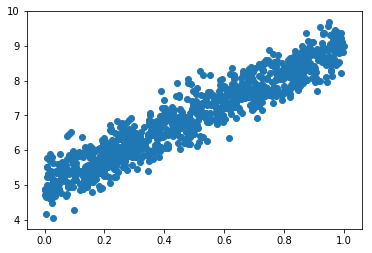

In [125]:
n = 1000
m = 4
b = 5
x, y = generate_linear_data(n, m, b)
plt.scatter(x, y)

## Define a loss function

In [43]:
def mean_squared_error(y, y_pred):
    return ((y_pred - y)**2).mean()

In [47]:
def mse_loss(x, m, b, y):
    return mean_squared_error(linear(x, m, b), y)

## Define pytorch variables to allow for differention during gradient descent

In [126]:
# Let's first generate some new fake data
x, y = generate_linear_data(10000, 2, 5)

# Then let us make x and y tensors
x = t.autograd.Variable(t.Tensor(x))
y = t.autograd.Variable(t.Tensor(y))


In [127]:
# Make random weights for m and x
m = t.autograd.Variable(t.randn(1), requires_grad=True)
b = t.autograd.Variable(t.randn(1), requires_grad=True)

## Run gradient descent on the entire data set 

In [128]:
# Set number of times you want to run through the entire data set
epochs = 10000
# Set a learning rate
lr = 0.001
for epoch in range(epochs):
    
    loss = mse_loss(x, m, b, y)
    
    if epoch % 1000 == 0:
        print(loss.data[0])
    
    loss.backward()
    
    m.data -= m.grad.data * lr
    b.data  -= b.grad.data * lr
    
    m.grad.data.zero_()
    b.grad.data.zero_()

47.44259262084961
0.5092019438743591
0.2090444415807724
0.19637365639209747
0.18794801831245422
0.1814686805009842
0.17647956311702728
0.17263780534267426
0.16967956721782684
0.16740161180496216


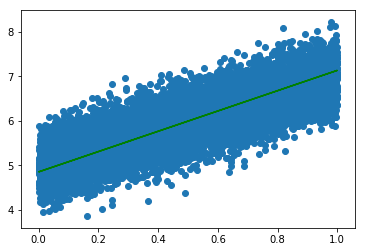

In [129]:
plt.plot(np.array(x.data.tolist()),linear(np.array(x.data.tolist()), m.data[0], b.data[0]), color='green')
plt.scatter(np.array(x.data.tolist()), np.array(y.data.tolist()))